In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import random
import numpy as np
from scipy.special import factorial

In [2]:
xl_file = pd.ExcelFile("data/GM counter.xlsx")

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [3]:
bg = dfs['BACKGROUND'];
bgp = bg.iloc[:, 3:]
src = dfs['SOURCE']
src.head()

,VOLTAGE,COUNTS,Unnamed: 2,VOLTAGE,COUNTS(41s),Unnamed: 5,Cs(137) WITH DUMMY(180s),Unnamed: 7
0,150.0,0.0,NaN,550,989,NaN,VOLTAGE,COUNTS
1,170.0,0.0,NaN,550,980,NaN,550,1556
2,190.0,0.0,NaN,550,957,NaN,NaN,NaN
3,210.0,0.0,NaN,550,1017,NaN,Cs(137) WITH Co(60) (180s),NaN
4,230.0,0.0,NaN,550,988,NaN,VOLTAGE,COUNTS


## Plateau Graph

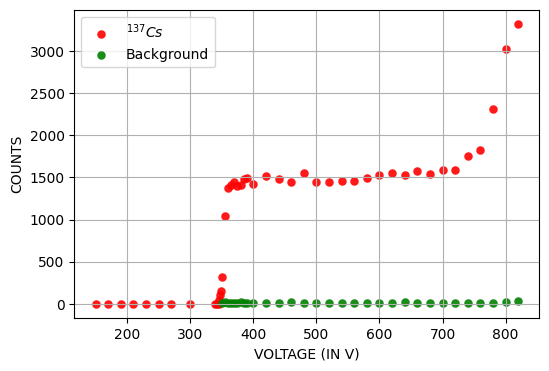

In [4]:
plt.figure(figsize=[6,4])

plt.scatter(src.iloc[:, 0], src.iloc[:, 1], alpha=0.9, linewidths=0.1, color="red", label=r"$^{137}Cs$")

plt.scatter(bg.iloc[:, 0], bg.iloc[:, 1], alpha=0.9, linewidths=0.1, color="green", label = "Background")

plt.xlabel("VOLTAGE (IN V)")
plt.ylabel("COUNTS")
plt.grid()
plt.legend()

In [5]:
## Part 1

def linear(x, m, c):
    return m * x + c

xdata = src.iloc[15:42, 0]  
ydata = src.iloc[15:42, 1]

params = optimize.curve_fit(linear, xdata, ydata,)

print("Slope of plateau: ", params[0][0])
print("Operating Voltage: ", ydata.mean())

Slope of plateau:  0.7475445639444885
Operating Voltage:  1491.0740740740741


In [6]:
## Part 2

In [14]:
for i in range(50, len(bgp["COUNTS.1"])):
    bgp["COUNTS.1"][i] = random.poisson(10.6, 1) ## everytime df is updates and mean is updated too
bgp.head()

/tmp/ipykernel_15563/557193022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgp["COUNTS.1"][i] = random.poisson(10.6, 1) ## everytime df is updates and mean is updated too


,VOLTAGE.1,COUNTS.1
0,550,9.0
1,550,10.0
2,550,11.0
3,550,20.0
4,550,7.0


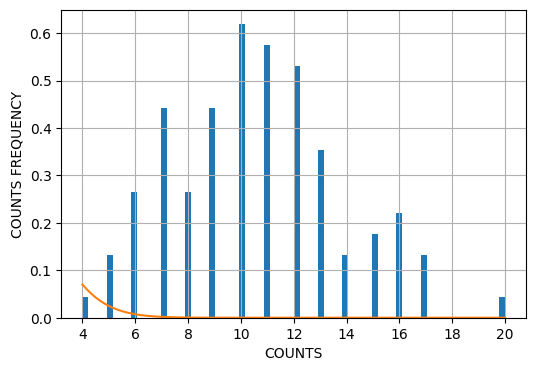

In [41]:
plt.figure(figsize=[6,4])
(n, bins, patches) = plt.hist(bgp["COUNTS.1"], bins=70, density=True)

def poiss(x, mu): ## n = counts, mu = mean
    return mu**x * np.exp(-mu) / factorial(x)


(mu, params) = optimize.curve_fit(poiss, bins[:-1], n)

x = np.linspace(bins.min(), bins.max(), 100)

plt.plot(x, poiss(x, mu[0]))

plt.ylabel("COUNTS FREQUENCY")
plt.xlabel("COUNTS")
plt.grid()
plt.show()

In [39]:
poiss(x, mu[0])

array([0.01914669, 0.02170775, 0.02447434, 0.027445  , 0.03061589,
       0.03398075, 0.03753081, 0.04125478, 0.04513893, 0.04916711,
       0.05332086, 0.05757963, 0.06192089, 0.06632041, 0.07075251,
       0.07519033, 0.07960614, 0.08397165, 0.08825839, 0.09243798,
       0.09648251, 0.10036485, 0.10405895, 0.10754019, 0.11078558,
       0.11377409, 0.11648679, 0.1189071 , 0.1210209 , 0.12281667,
       0.12428554, 0.12542138, 0.12622075, 0.12668293, 0.12680978,
       0.12660573, 0.1260776 , 0.12523449, 0.12408758, 0.12264996,
       0.12093644, 0.11896331, 0.11674816, 0.1143096 , 0.11166709,
       0.10884069, 0.10585086, 0.10271822, 0.0994634 , 0.09610681,
       0.09266849, 0.08916795, 0.08562403, 0.08205479, 0.07847736,
       0.07490789, 0.0713615 , 0.06785213, 0.06439263, 0.06099462,
       0.05766854, 0.05442365, 0.05126804, 0.04820863, 0.04525124,
       0.04240063, 0.03966051, 0.03703366, 0.03452194, 0.03212637,
       0.0298472 , 0.02768398, 0.0256356 , 0.02370039, 0.02187